# Student Performance Indicator

## Life Cycle of a Machine Learning Project
- Understanding the problem statement
- Data Collection
- Data Check to perform
- Exploratory Data Analysis
- Data Preprocessing
- Model Training
- Choose best model

## 1) Problem Statement 

- The project understands how the student performance (test Scores) is affected by the other variables such as gender ,ethinicity ,parental level of education,lunch and test preparation course.

## 2) Data Collection 
- Data Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
- The Data Consists of 8 columns and 1000 rows

## 2.1 Import Data And Required Packages
- like pandas numpy matplotlib seaborn and warnings library



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## Import the csv data as python data frame

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()  ## it will show the top 5 records

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

## 3) Data Checks to perform
- check missing values
- check duplicated
- check data types
- check the number of unique values of each column
- check statistics of dataset
- check various categories present in the different catagorical column

In [6]:
## check missing values 
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

* There is no missing values

In [11]:
## checking for the dublicates
df.duplicated().sum()

np.int64(0)

- there is no duplicates

In [12]:
## checking the data types now 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
## checking the number of unique values of each column

In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
## check statistics of data

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
## 3.7 Exploring Data

In [21]:
print("Categories in gender variable : " ,end=" ")
print(df['gender'].unique())

print("Categoris in race/ethinicity variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categoris in 'parental level of education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categoris in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categoris in 'test_preparation_course' variable: ",end=" ")
print(df['test_preparation_course'].unique())

Categories in gender variable :  ['female' 'male']
Categoris in race/ethinicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categoris in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categoris in 'lunch' variable:  ['standard' 'free/reduced']
Categoris in 'test_preparation_course' variable:  ['none' 'completed']


## now we define numerical and categorical columns 

In [23]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

## print columns 
print(f"we have {len(numeric_features)} numerical features : {numeric_features}")
print(f"we have {len(categorical_features)} categorical features : {categorical_features}")

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## we will add columns for total score and average

In [24]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f"Number of Students with full marks in maths : {math_full}")
print(f"Number of Students with full marks in reading : {reading_full}")
print(f"Number of Students with full marks in writing : {writing_full}")

Number of Students with full marks in maths : 7
Number of Students with full marks in reading : 17
Number of Students with full marks in writing : 14


In [30]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f"Number of Students with less than 20 marks in maths : {math_less_20}")
print(f"Number of Students with less than 20 marks in reading : {reading_less_20}")
print(f"Number of Students with less than 20 marks in writing : {writing_less_20}")

Number of Students with less than 20 marks in maths : 4
Number of Students with less than 20 marks in reading : 1
Number of Students with less than 20 marks in writing : 3


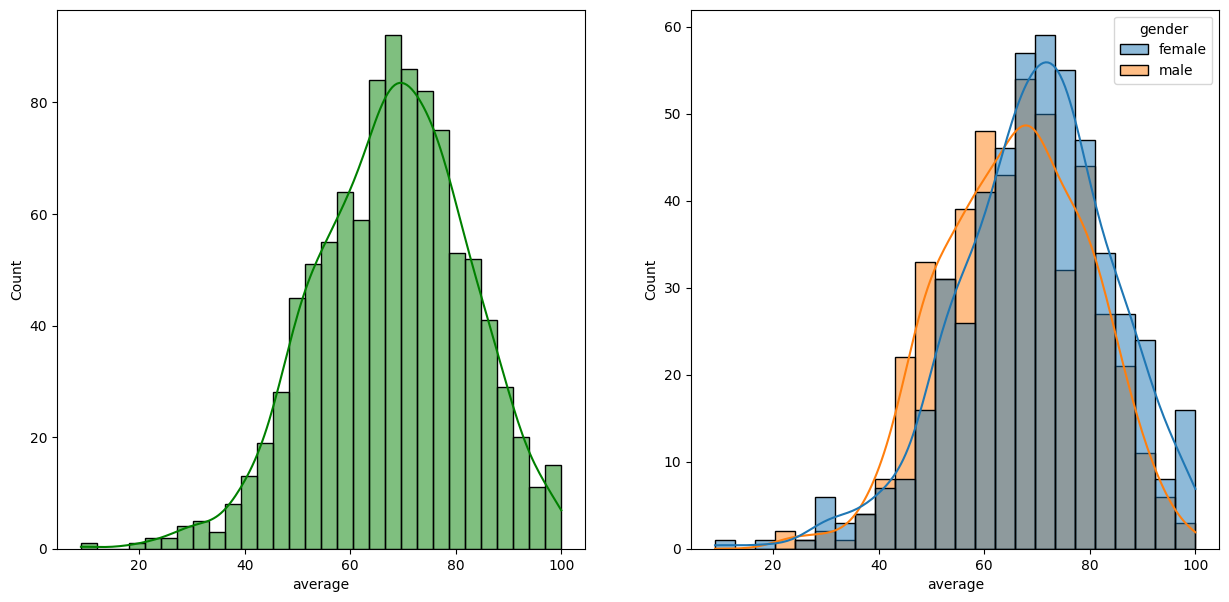

In [32]:
fig , axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

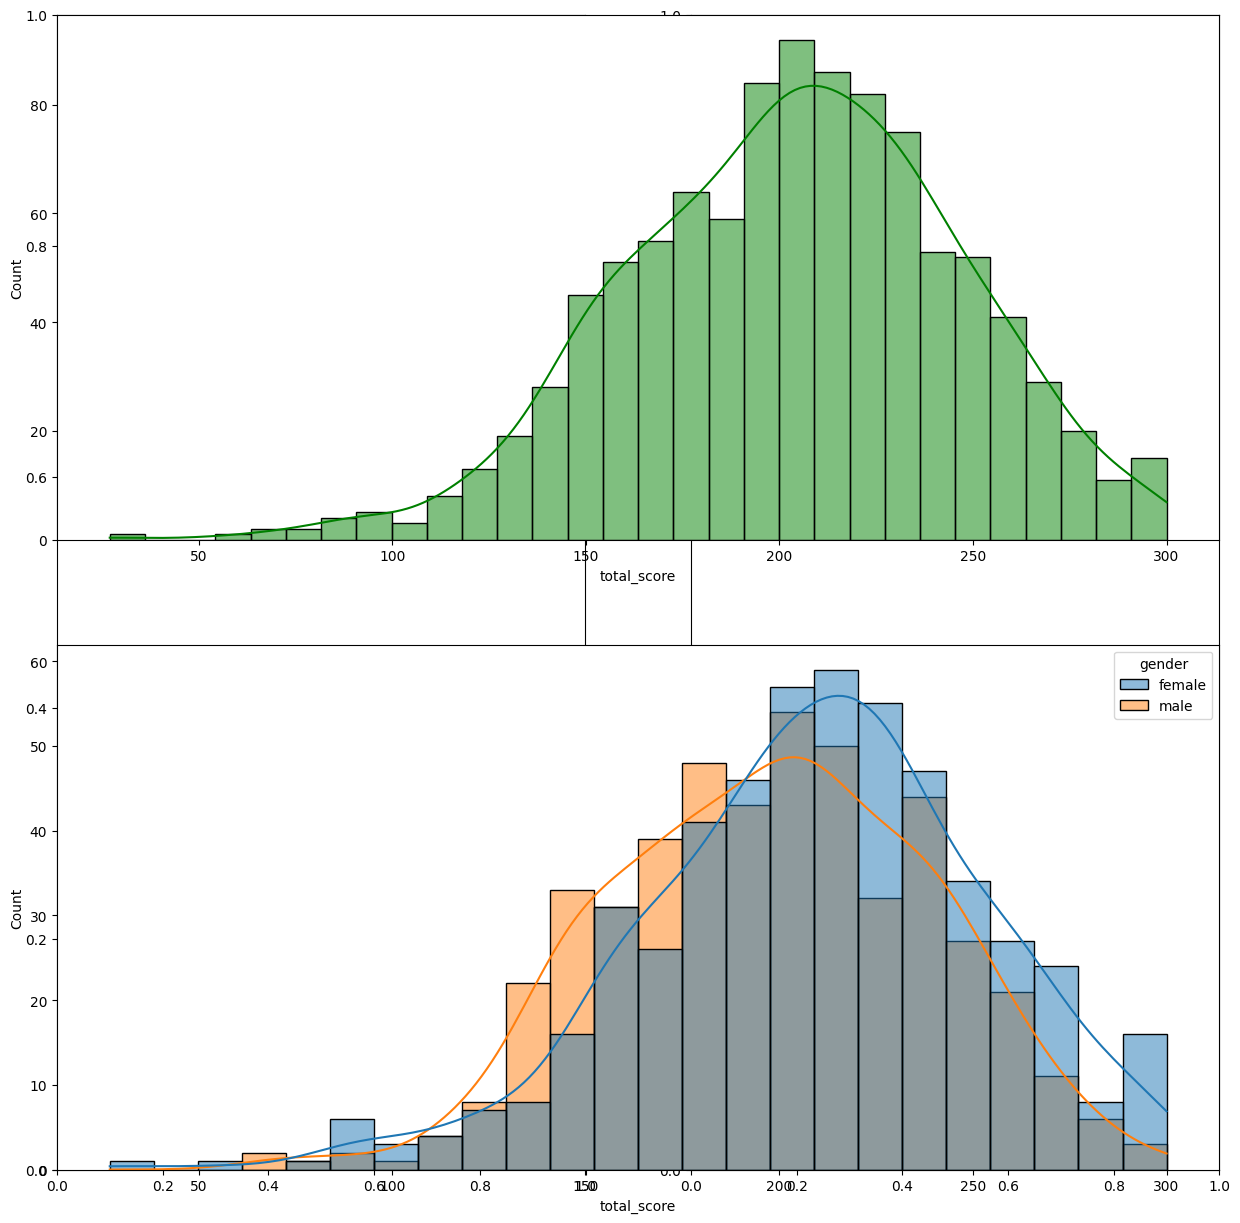

In [37]:
fig , axs = plt.subplots(1,2,figsize=(15,15))
plt.subplot(2,1,1)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(2,1,2)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

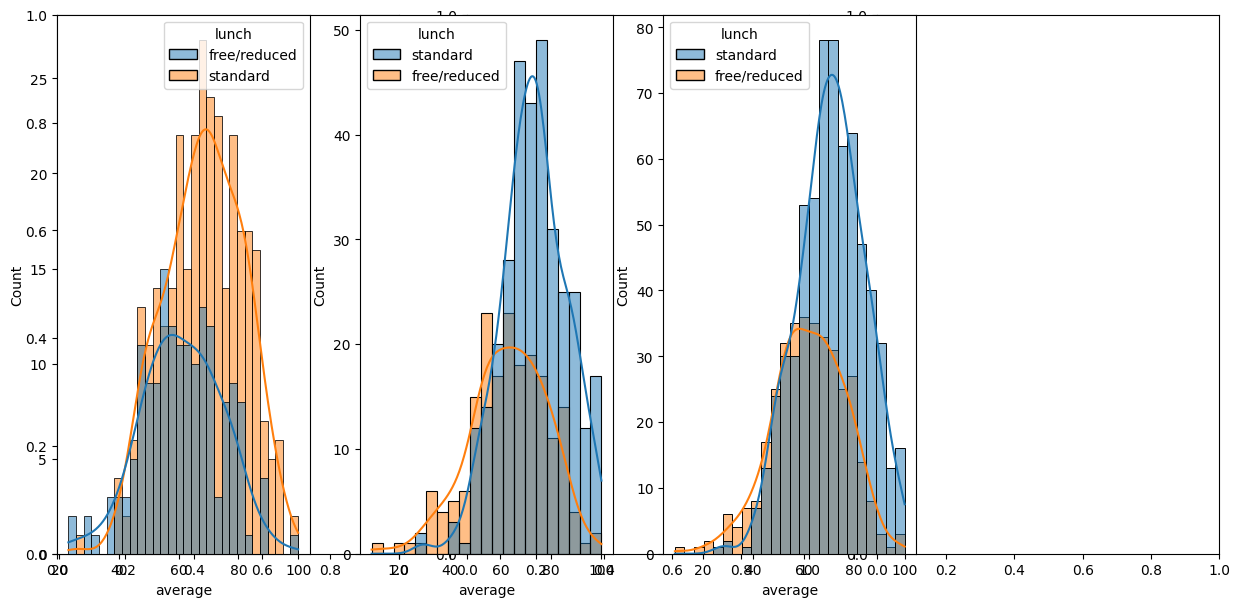

In [39]:
fig , axs = plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,color='g',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.show()